<a href="https://colab.research.google.com/github/sangeeth-sathyan-k/DSproject/blob/master/Loan_Approval_Prediction_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Approval Prediction using Machine Learning**

## **The objective of this project is to develop a machine learning model that can predict whether a loan application will be approved or not, based on various features and attributes of the applicant.**


### **The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status.**

## **Reading the Data**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Project/Loan Approval prediction/Loan prediction.csv')

## **Analysing the Data**

In [ ]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


**Feature Descriptions**

- **person_age:** Applicant's age in years.

- **person_income:** Annual income of the applicant.

- **person_home_ownership:** Status of home ownership (e.g., Rent, Own, Mortgage).

- **person_emp_length:** Length of employment in years.

- **loan_intent:** Purpose of the loan (e.g., Education, Medical, Personal).

- **loan_grade:** Risk grade assigned to the loan, assessing the applicant's credit worthiness.

- **loan_amnt:** Total loan amount requested by the applicant.

- **loan_int_rate:** Interest rate associated with the loan.

- **loan_status:** The approval status of the loan (approved or not approved).

- **loan_percent_income:** Percentage of the applicant's income allocated towards loan repayment.

- **cb_person_default_on_file:** Indicates if the applicant has a history of default ('Y' for yes, 'N' for no).

  [ Default is the failure to make required interest or principal repayment on a debt ]

- **cb_person_cred_hist_length:** Length of the applicant's credit history in years

In [ ]:
df.tail()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0
58644,58644,31,75000,MORTGAGE,2.0,VENTURE,B,15000,11.11,0.20,N,5,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [ ]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [ ]:
df.shape

(58645, 13)

In [ ]:
# checking null values

df.isna().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
for i in df.columns:
  print(df[i].unique(),i)
  print('_____________________')

[    0     1     2 ... 58642 58643 58644] id
_____________________
[ 37  22  29  30  27  25  21  35  31  26  28  32  23  24  33  44  38  43
  46  48  36  41  34  40  47  42  51  50  39  56  60  49  58  54  45  59
  65  53  55  57  52  62  64  84  70  66  73  69  61  20  80  76 123] person_age
_____________________
[ 35000  56000  28800 ...  44955  90730 124600] person_income
_____________________
['RENT' 'OWN' 'MORTGAGE' 'OTHER'] person_home_ownership
_____________________
[  0.   6.   8.  14.   2.   9.  11.   5.   1.  13.   3.  10.  12.   4.
   7.  21.  17.  16.  18.  19.  15.  20.  23.  24.  26.  22.  25.  41.
  27.  28.  35.  29.  30.  31. 123.  39.] person_emp_length
_____________________
['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT'] loan_intent
_____________________
['B' 'C' 'A' 'D' 'E' 'F' 'G'] loan_grade
_____________________
[ 6000  4000 12000  9000  2500  5000 15000 12800 10000 16000  7300 17000
  5950  4800  3200  7000  3000  3500 14000  

In [ ]:
for i in df.columns:
  print(df[i].value_counts())
  print('__________________________')

id
0        1
39089    1
39091    1
39092    1
39093    1
        ..
19551    1
19552    1
19553    1
19554    1
58644    1
Name: count, Length: 58645, dtype: int64
__________________________
person_age
23     7726
22     7051
24     6395
25     5067
27     4450
26     3874
28     3707
29     3270
30     2333
31     1917
21     1795
32     1565
33     1306
36     1117
34     1041
37      992
35      862
38      745
39      536
40      438
41      433
43      320
42      291
44      229
46      164
45      163
47      125
48       97
53       75
51       69
50       63
52       62
54       60
49       59
58       35
55       34
56       29
60       28
57       25
65       13
61       13
20       12
66       11
64       10
70       10
62        7
69        6
59        6
73        3
84        2
80        2
76        1
123       1
Name: count, dtype: int64
__________________________
person_income
60000     4164
50000     2992
30000     2200
40000     1981
70000     1876
          ... 
4860

In [ ]:
# checking duplicates

dup = df.duplicated().sum()
dup

0

In [ ]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [ ]:
df = df.drop('id',axis = 1)

## **Data Visualization**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

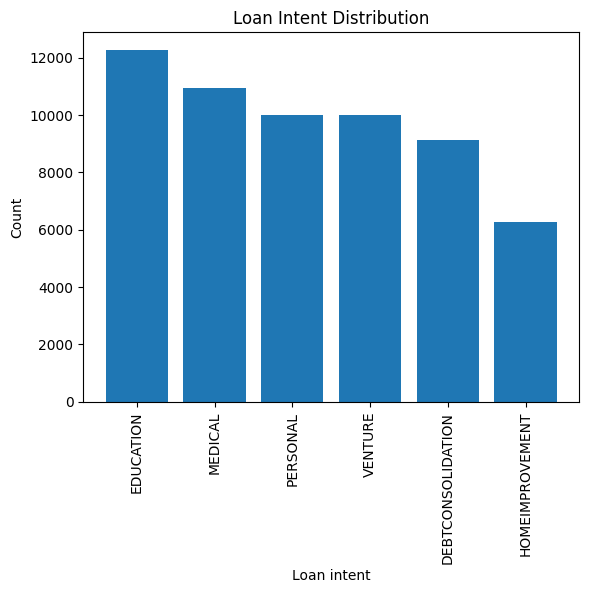

In [ ]:
plt.title('Loan Intent Distribution')      # Bar Diagram, showing the count of each purpose of loan
plt.xlabel('Loan intent')
plt.ylabel('Count')
plt.xticks(rotation = 90)

plt.bar(df['loan_intent'].unique(),df['loan_intent'].value_counts())
plt.show()

Most of the peoples taking loan for Educational purpose and least are home improvement

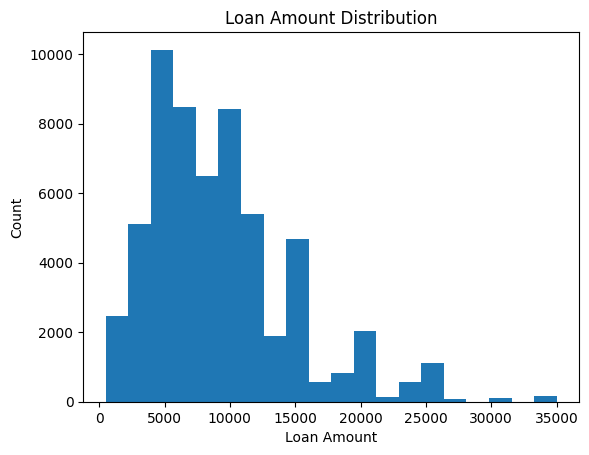

In [ ]:
plt.title('Loan Amount Distribution')      # Histogram
plt.xlabel('Loan Amount')
plt.ylabel('Count')

plt.hist(df['loan_amnt'],bins = 20)
plt.show()

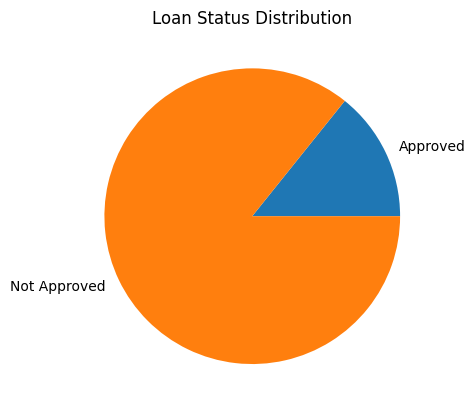

In [ ]:
# Pie chart

approved = df[df['loan_status'] == 1]['loan_status'].count()
not_approved = df[df['loan_status'] == 0]['loan_status'].count()
x = [approved,not_approved]
plt.title('Loan Status Distribution')

plt.pie(x,labels = ['Approved','Not Approved'])
plt.show()

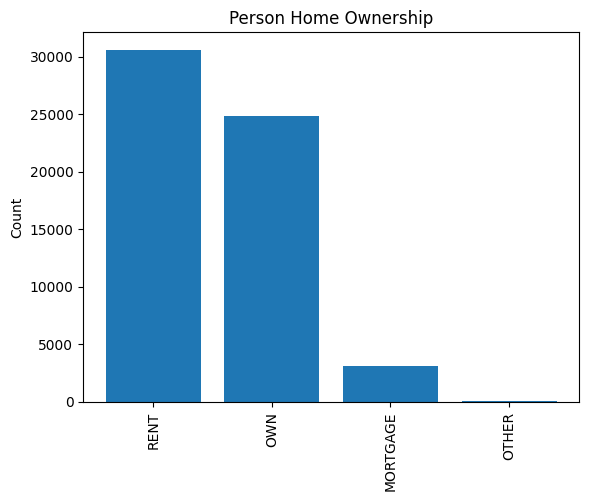

In [ ]:
plt.title('Person Home Ownership')      # Bar Diagram

plt.ylabel('Count')
plt.xticks(rotation = 90)

plt.bar(df['person_home_ownership'].unique(),df['person_home_ownership'].value_counts())
plt.show()

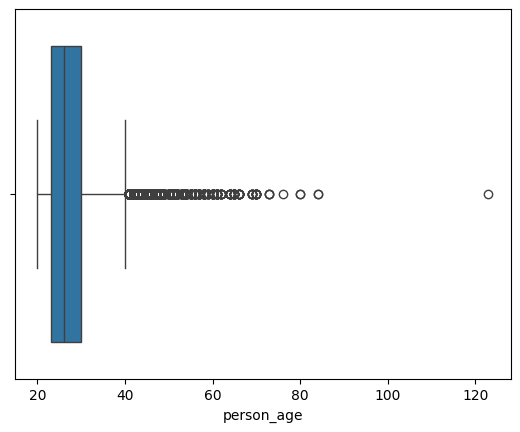

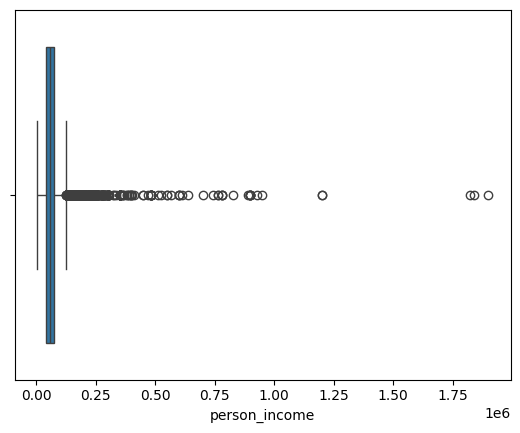

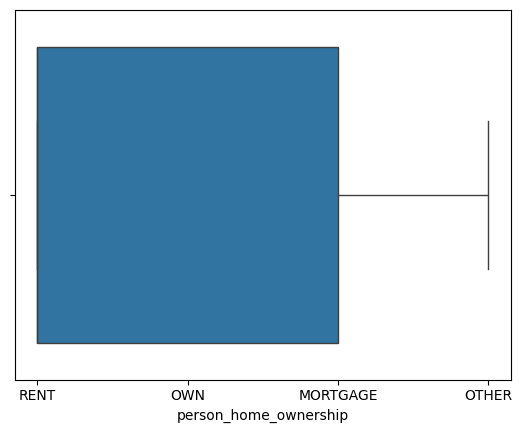

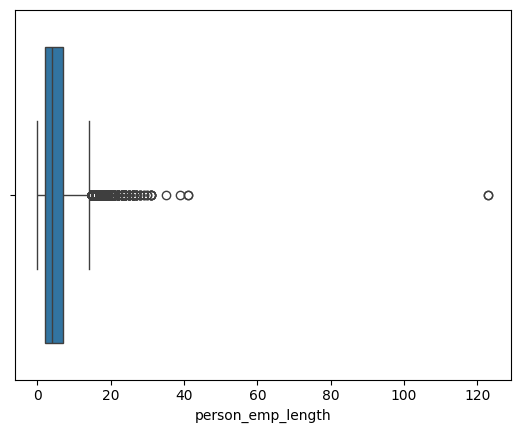

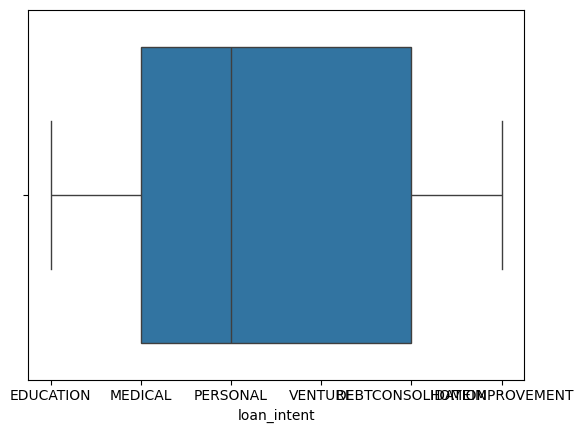

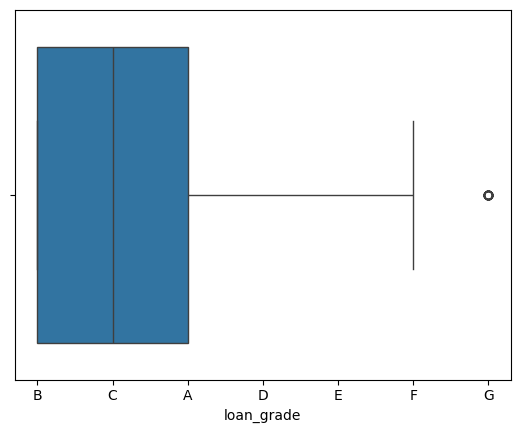

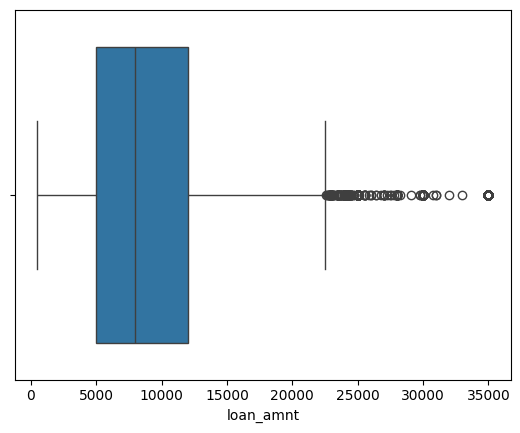

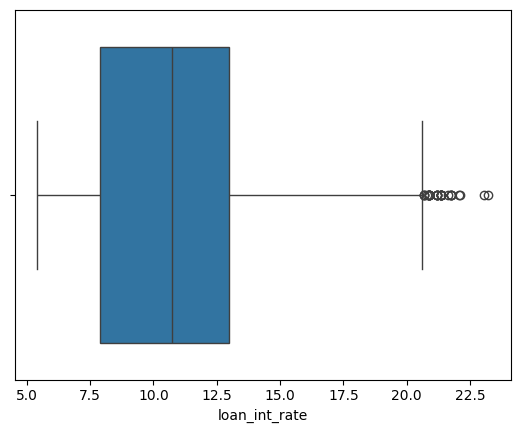

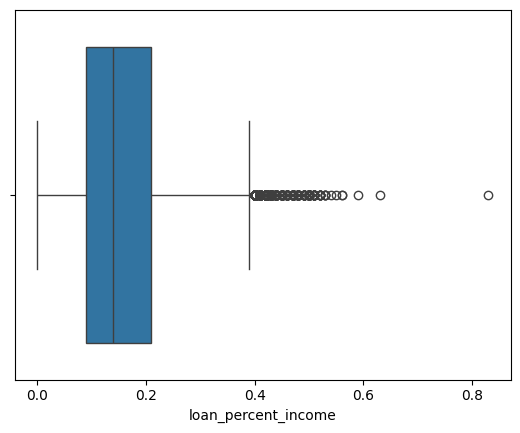

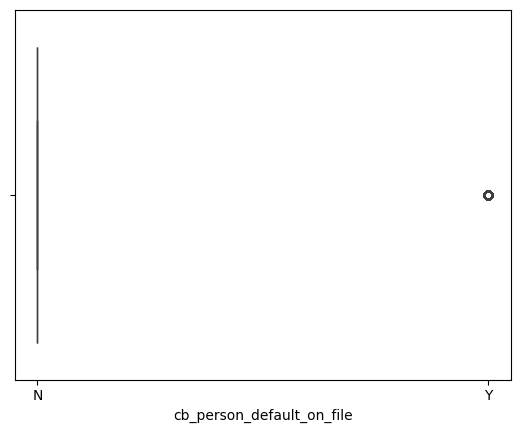

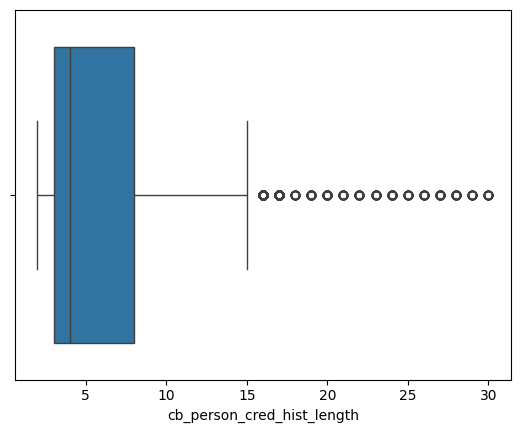

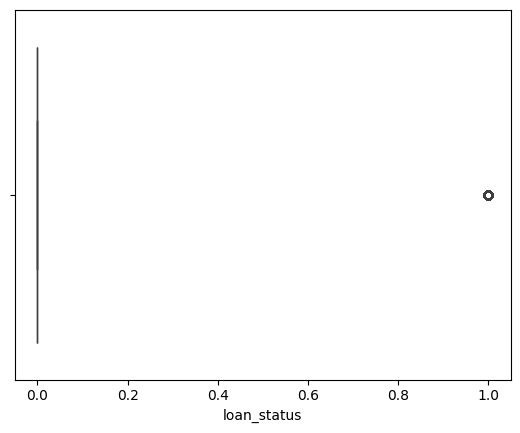

In [ ]:
for i in df.columns:
  sns.boxplot(x = df[i])
  plt.show()

In [ ]:
# Removing outliers from Age, person income, employment length

Q1 = df['person_age'].quantile(0.25)
Q3 = df['person_age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['person_age'] < lower_bound) | (df['person_age'] > upper_bound)]

In [ ]:
print(lower_bound)
print(upper_bound)

12.5
40.5


In [ ]:
outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
44,44,58000,RENT,13.0,HOMEIMPROVEMENT,C,15000,14.27,0.26,Y,17,0
70,43,68000,MORTGAGE,0.0,MEDICAL,A,5000,8.90,0.07,N,17,0
78,46,120000,RENT,0.0,DEBTCONSOLIDATION,B,20000,10.37,0.17,N,14,0
86,48,112000,MORTGAGE,21.0,MEDICAL,A,5000,7.90,0.04,N,17,0
100,41,100000,MORTGAGE,6.0,PERSONAL,B,15000,11.49,0.15,N,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58542,43,36000,RENT,2.0,VENTURE,A,9000,5.99,0.25,N,11,0
58552,54,60000,RENT,4.0,PERSONAL,B,8000,10.37,0.13,N,20,0
58565,41,90000,RENT,0.0,VENTURE,B,15000,10.38,0.17,N,11,0
58604,62,150000,MORTGAGE,3.0,PERSONAL,E,24000,16.95,0.16,Y,20,0


In [ ]:
# Remove Outliers

df = df[(df['person_age'] >= lower_bound) & (df['person_age'] <= upper_bound)]

In [ ]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [ ]:
Q1 = df['person_emp_length'].quantile(0.25)
Q3 = df['person_emp_length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['person_emp_length'] < lower_bound) | (df['person_emp_length'] > upper_bound)]

In [ ]:
print(lower_bound)
print(upper_bound)
outliers

-5.5
14.5


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
104,33,46000,MORTGAGE,17.0,PERSONAL,C,6000,12.68,0.13,Y,6,0
132,32,150000,RENT,16.0,HOMEIMPROVEMENT,A,25000,7.88,0.17,N,9,0
145,34,54000,MORTGAGE,16.0,MEDICAL,A,5000,6.03,0.09,N,5,0
261,32,55000,MORTGAGE,16.0,VENTURE,D,12500,15.70,0.23,N,9,0
278,34,85000,MORTGAGE,18.0,EDUCATION,B,20000,10.65,0.24,N,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58413,37,150000,MORTGAGE,15.0,EDUCATION,B,25000,11.36,0.17,N,12,0
58421,33,78000,MORTGAGE,17.0,VENTURE,B,6000,9.91,0.08,N,10,0
58460,33,95000,MORTGAGE,17.0,DEBTCONSOLIDATION,A,12000,7.66,0.13,N,5,0
58527,33,120000,MORTGAGE,17.0,VENTURE,A,7000,8.90,0.06,N,5,0


In [ ]:
# Remove Outliers

df = df[(df['person_emp_length'] >= lower_bound) & (df['person_emp_length'] <= upper_bound)]

In [ ]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55165 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  55165 non-null  int64  
 1   person_income               55165 non-null  int64  
 2   person_home_ownership       55165 non-null  object 
 3   person_emp_length           55165 non-null  float64
 4   loan_intent                 55165 non-null  object 
 5   loan_grade                  55165 non-null  object 
 6   loan_amnt                   55165 non-null  int64  
 7   loan_int_rate               55165 non-null  float64
 8   loan_percent_income         55165 non-null  float64
 9   cb_person_default_on_file   55165 non-null  object 
 10  cb_person_cred_hist_length  55165 non-null  int64  
 11  loan_status                 55165 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.5+ MB


In [ ]:
df['person_home_ownership'].value_counts()

,count
person_home_ownership,
RENT,29138
MORTGAGE,23005
OWN,2939
OTHER,83


In [ ]:
df['loan_intent'].value_counts()

,count
loan_intent,
EDUCATION,11832
MEDICAL,10275
VENTURE,9390
PERSONAL,9150
DEBTCONSOLIDATION,8710
HOMEIMPROVEMENT,5808


In [ ]:
from sklearn.preprocessing import LabelEncoder    # converting text data into numeric data using LabelEncoder

le = LabelEncoder()

df['loan_intent'] = le.fit_transform(df['loan_intent'])
df['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])
df['loan_grade'] = le.fit_transform(df['loan_grade'])
df['cb_person_default_on_file'] = le.fit_transform(df['cb_person_default_on_file'])

In [ ]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,3,0.0,1,1,6000,11.49,0.17,0,14,0
1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2,0
2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10,0
3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5,0
4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,0,5.0,1,3,25000,15.95,0.21,1,10,0
58641,28,28800,3,0.0,3,2,10000,12.73,0.35,0,8,1
58642,23,44000,3,7.0,1,3,6800,16.00,0.15,0,2,1
58643,22,30000,3,2.0,1,0,5000,8.90,0.17,0,3,0


In [ ]:
df['person_home_ownership'].value_counts()

# Mortage = 0
# Other = 1
# Own = 2
# Rent = 3

,count
person_home_ownership,
3,29138
0,23005
2,2939
1,83


In [ ]:
df['loan_intent'].value_counts()

# DEBTCONSOLIDATION = 0
# EDUCATION = 1
# HOMEIMPROVEMENT = 2
# MEDICAL = 3
# PERSONAL = 4
# VENTURE = 5

,count
loan_intent,
1,11832
3,10275
5,9390
4,9150
0,8710
2,5808


In [ ]:
corln = df.corr()['loan_status']
corln

,loan_status
person_age,-0.011544
person_income,-0.169558
person_home_ownership,0.218770
person_emp_length,-0.113953
loan_intent,-0.046062
loan_grade,0.387289
loan_amnt,0.146423
loan_int_rate,0.339788
loan_percent_income,0.379544
cb_person_default_on_file,0.189156


In [ ]:
x = df.drop('loan_status',axis = 1)
y = df['loan_status']

In [ ]:
x

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,3,0.0,1,1,6000,11.49,0.17,0,14
1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2
2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10
3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5
4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3
...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,0,5.0,1,3,25000,15.95,0.21,1,10
58641,28,28800,3,0.0,3,2,10000,12.73,0.35,0,8
58642,23,44000,3,7.0,1,3,6800,16.00,0.15,0,2
58643,22,30000,3,2.0,1,0,5000,8.90,0.17,0,3


In [ ]:
y

,loan_status
0,0
1,0
2,0
3,0
4,0
...,...
58640,0
58641,1
58642,1
58643,0


In [ ]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [ ]:
ytrain.value_counts()

,count
loan_status,
0,37769
1,6363


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

x_res,y_res = sm.fit_resample(xtrain,ytrain)

y_res.value_counts()

,count
loan_status,
0,37769
1,37769


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)

scaler.fit(xtest)
xtest = scaler.transform(xtest)

x_res = scaler.fit_transform(x_res)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

knn = KNeighborsClassifier(n_neighbors = 3,weights = 'distance',p = 2)
tree = DecisionTreeClassifier(max_depth = 4,criterion = 'entropy')
logi = LogisticRegression()
naive = GaussianNB()
svm = svm.SVC()
rFc = RandomForestClassifier(n_estimators = 20, criterion = 'gini', max_depth = 5, max_features = 5)

model = [knn,tree,logi,naive,svm,rFc]

from sklearn.metrics import accuracy_score

for i in model:
  i.fit(xtrain,ytrain)
  ypred = i.predict(xtest)
  print(ypred)
  print(i)
  print(accuracy_score(ytest,ypred))
  print('_________________________________________________')

[0 1 0 ... 1 0 1]
KNeighborsClassifier(n_neighbors=3, weights='distance')
0.8617783014592586
_________________________________________________
[0 1 0 ... 1 0 1]
DecisionTreeClassifier(criterion='entropy', max_depth=4)
0.839572192513369
_________________________________________________
[0 1 0 ... 1 0 1]
LogisticRegression()
0.8354935194416749
_________________________________________________
[0 1 0 ... 1 0 1]
GaussianNB()
0.810840206652769
_________________________________________________
[0 1 0 ... 1 0 1]
SVC()
0.8489078219885797
_________________________________________________
[0 1 0 ... 1 0 1]
RandomForestClassifier(max_depth=5, max_features=5, n_estimators=20)
0.8417474848182724
_________________________________________________


## **Hyper Parameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5)

model.fit(xtrain,ytrain)

KNeighborsClassifier()

In [ ]:
ypred = model.predict(xtest)
ypred

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

0.8730173117012598
[[8551  995]
 [ 406 1081]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      9546
           1       0.52      0.73      0.61      1487

    accuracy                           0.87     11033
   macro avg       0.74      0.81      0.77     11033
weighted avg       0.90      0.87      0.88     11033



In [ ]:
cls1 = KNeighborsClassifier()

In [ ]:
params = {'n_neighbors':[3,5,7,9,11],'weights':['uniform','distance']}

clf = GridSearchCV(cls1,params,cv = 10,scoring = 'accuracy')

clf.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
clf.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [ ]:
model = KNeighborsClassifier(n_neighbors = 9,weights = 'distance')

model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [ ]:
ypred = model.predict(xtest)
ypred

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

0.8785461796428895
[[8631  915]
 [ 425 1062]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      9546
           1       0.54      0.71      0.61      1487

    accuracy                           0.88     11033
   macro avg       0.75      0.81      0.77     11033
weighted avg       0.90      0.88      0.89     11033



In [ ]:
import pickle

pickle.dump(model,open('Model.sav','wb'))

In [ ]:
import pickle

pickle.dump(scaler,open('Scaler.sav','wb'))

In [ ]:
pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.19
albumentations                     1.4.20
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.21.0.33.21
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread      